In [2]:
from trustyai.model import feature, PredictionInput
from trustyai.utils import TestModels
from trustyai.explainers.pdp import PDPExplainer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

Initialize a simple regression model that accepts numerical features, sums up their values except for one of them, defined by the user (_feature-0_ in this case).
Also, a set of _100_ inputs with randomly picked integers (between _-100_ and _100_) is generated.

In [3]:
model = TestModels.getSumSkipModel(0)

no_of_features = 5
data = []
for i in range(100):
    data.append(PredictionInput([feature(name=f"f-num{i}", value=np.random.randint(-100, 100), dtype="number") for i in range(no_of_features)]))

Initialize _TrustyAI_ *Partial Dependence Plot Explainer*.

In [4]:
pdp_explainer = PDPExplainer()

Generate the partial dependence results on the model and generated data.

In [5]:
pdp_results = pdp_explainer.explain(model, data)

Visualize the partial dependence information in a `pd.DataFrame`.
The resulting table contains feature values and each feature name as columns and marginal per-feature outputs as rows.

In [6]:
pdp_results.as_dataframe()

,-96.0,-95.0,-94.0,-93.0,-90.0,-88.0,-86.0,-80.0,-77.0,-70.0,...,-3.0,9.0,33.0,43.0,61.0,64.0,76.0,86.0,87.0,92.0
0,-25.32,-25.32,-25.32,-25.32,-25.32,-25.32,-25.32,-25.32,-25.32,-25.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-108.89,NaN,-106.89,NaN,NaN,NaN,NaN,-92.89,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-85.70,-78.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,-119.33,NaN,-117.33,-114.33,NaN,-110.33,NaN,-101.33,-94.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-33.04,-21.04,2.96,12.96,30.96,33.96,45.96,55.96,56.96,61.96


Plot the partial dependence information for each feature.
The ignored feature is expected to have a constant output, regardless of its input value, because the model ignores it.
Partial dependence for all other features will linearly increase with as the input value becomes bigger.

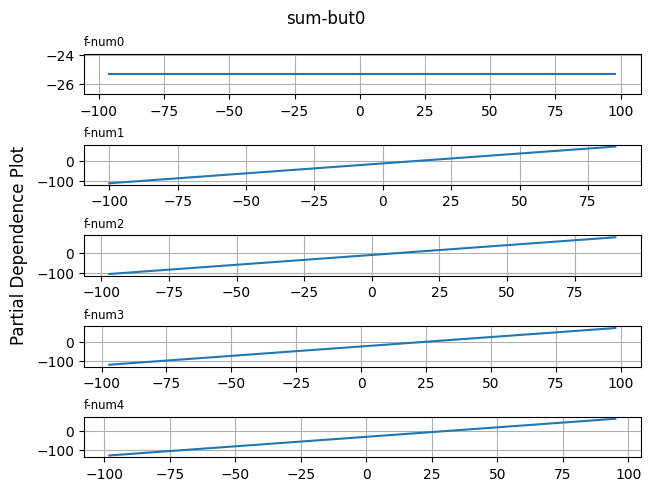

In [7]:
pdp_results.plot()

Generate some additional random data, using _sklearn_ library, that can be more suited for classification tasks.
Features are still numerical.

In [8]:
def create_random_dataframe_classifier():
    X, _ = make_classification(n_samples=5000, n_features=5, n_classes=2,
                               n_clusters_per_class=2, class_sep=2, flip_y=0, random_state=23)

    return pd.DataFrame({
        'x1': X[:, 0],
        'x2': X[:, 1],
        'x3': X[:, 2],
        'x4': X[:, 3],
        'x5': X[:, 4],
    })

In [9]:
df = create_random_dataframe_classifier()
df.head()

,x1,x2,x3,x4,x5
0,-2.124064,1.608138,-0.404920,0.942188,-2.754050
1,3.048919,-2.428100,0.427166,-1.466329,4.053088
2,2.241751,-2.109687,-0.410332,-1.386671,3.250637
3,3.299680,-1.386333,0.149882,-0.406165,3.351016
4,2.226471,-0.992053,-0.475162,-0.327913,2.308332


Initialize a simple classifier that performs linear combination of its weights and input features.
The model returns `true` whether the output is bigger than a predetermined _threshold_.

In [10]:
class_model = TestModels.getLinearThresholdModel([0.1, 0.2, 0.3, 0.4, 0.5], 0)

Generate results for partial dependence on the classification model and generated data and visualize them in a `pd.DataFrame`.

In [11]:
class_pdp_results = pdp_explainer.explain(class_model, df)
class_pdp_results.as_dataframe()

,-3.207249,-2.979096,-2.897100,-2.883665,-2.611461,-2.483114,-2.470594,-2.449044,-2.395130,-2.392696,...,3.371716,3.371795,3.434113,3.518815,3.547087,3.554301,3.590788,3.981243,4.041798,4.140641
0,false,false,false,false,false,false,false,false,false,false,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,true,true,true,true,true,true,true,true,true,true


Plot the partial dependence information.

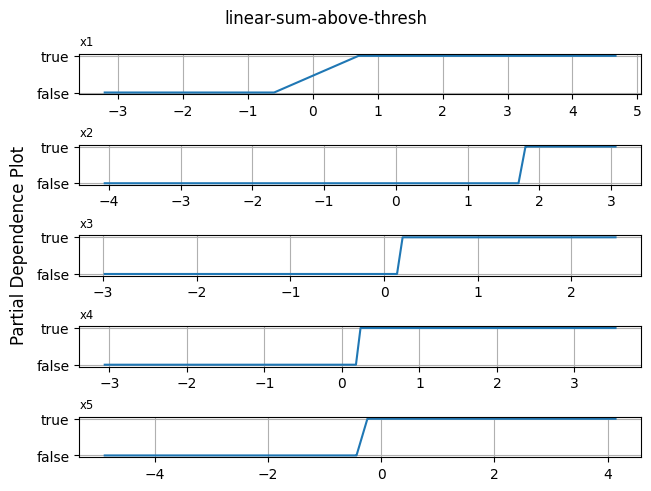

In [12]:
class_pdp_results.plot()